# Исследование объявлений о продаже квартир

В распоряжении — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### №1. Изучим общую информацию о файле:

In [97]:
import pandas as pd
import matplotlib.pyplot as plt 


In [98]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим данные о таблице:

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 23 столбца, 23699 записей. Не все столбцы заполнены до конца, также столбец first_day_exposition имеет тип object, а не datetime. Вещественный тип данных в столбцах floors_total и balcony.

Исследуем столбцы с небольшим числом уникальных значений на наличие артефактов:

In [100]:
columns = ['rooms', 'floors_total', 'total_images', 'floor', 'balcony', 'studio', 'is_apartment']
def uniqval(column):
    print('Число уникальных значений по столбцу', i + ': {}'.format(len(df[column].unique())))
    print('Список значений:')
    print(df[column].unique())
    print()
for i in columns:
    uniqval(i)


Число уникальных значений по столбцу rooms: 17
Список значений:
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

Число уникальных значений по столбцу floors_total: 37
Список значений:
[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]

Число уникальных значений по столбцу total_images: 38
Список значений:
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

Число уникальных значений по столбцу floor: 33
Список значений:
[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]

Число уникальных значений по столбцу balcony: 7
Список значений:
[nan  2.  0.  1.  5.  4.  3.]

Число уникальных значений по столбцу studio: 2
Список значений:
[False  True]

Число уникальных значений по столбцу is_apartment: 3
Список значений:
[nan False True]



In [101]:
print(df['rooms'].describe().astype(int))
print()
print(df['floors_total'].describe().astype(int))

count    23699
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

count    23613
mean        10
std          6
min          1
25%          5
50%          9
75%         16
max         60
Name: floors_total, dtype: int64


В столбцах rooms и floors_total сразу заметны неправдоподобно высокие значения, проверим их плотность:

In [102]:
print(df['floors_total'][df['floors_total'] >= 25].value_counts().sort_index())
print()
print(df['rooms'][df['rooms'] > 5].value_counts().sort_index())

25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

6     105
7      59
8      12
9       8
10      3
11      2
12      1
14      2
15      1
16      1
19      1
Name: rooms, dtype: int64


### Вывод

Таким образом, всего в таблице 23 столбца и 23699 записей, но не все столбцы заполнены до конца, столбец first_day_exposition имеет тип object, а не datetime. Вещественный тип данных в столбцах floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition из-за того, что в сотлбцах содержатся пропуски NaN. В столбце rooms - артефактное значение '0' и завышенные от 10, в столбце floors_total, странные значения в "52" и "60"

### №2. Выполним предобработку данных

Изучим подробнее пропуски:

In [103]:
print('Число пропусков по таблице:')
print(df.isna().sum())
print()
#Судя по всему часть пропусков будет пересекаться в разных столбцах
print('Пересекающиеся пропуски:')
print(df[(df['airports_nearest'].isna()) & (df['cityCenters_nearest'].isna())].isna().sum())

Число пропусков по таблице:
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пересекающиеся пропуски:
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          2575
floors_total              10
living_area              623
floor                      0
is_apartment

Локализовали пропущенные значения, также выяснили, что пропуски в столбцах cityCenters_nearest, parks_around300, ponds_around3000 имеют одинаковые индексы. Продолжим исследовать таблицу и найдем дубликаты:

In [104]:
df.duplicated().sum()

0

Дубликаты в таблице не обнаружены.

Будем постепенно заполнять пропуски. Начнем со столбца 'is_apartment'. Логично предположить, что NaN значения соотвествуют значению false, вероятно они появились из-за того, что пользователь не отметил это поле при заполнении.

In [105]:
def missed(column):
    print('Количество пропущенных значений в столбце', column + ':', df[column].isna().sum())
missed('is_apartment')
print()
print('Распределение по оставшимся значениям:')
print(df['is_apartment'].value_counts())
print()
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False
print('Распределение значений после заполнения пропусков:')
print(df['is_apartment'].value_counts())

Количество пропущенных значений в столбце is_apartment: 20924

Распределение по оставшимся значениям:
False    2725
True       50
Name: is_apartment, dtype: int64

Распределение значений после заполнения пропусков:
False    23649
True        50
Name: is_apartment, dtype: int64


Is_apartment заполнили, теперь разберемся с балконами: логично предположить, что значение NaN в этом поле указывает на отсутствие балкона, его также могли не указать при заполнении либо в системе не предусмотрено значение подходящее значение для этого поля

In [106]:
#print('Пропущенные значения в balcony по столбцу rooms:')
#print(df['rooms'].value_counts() - df.groupby('rooms')['balcony'].count())
print('Распределение значений по столбцу balcony:')
print(df['balcony'].value_counts())
print()
missed('balcony')
df['balcony'].fillna(0, inplace=True)
#заодно приведем пропущенные значения к целому типу:
df['balcony'] = pd.to_numeric(df['balcony'], errors='raise').astype(int)
print()
print('Распределение значений после заполнения:')
print(df['balcony'].value_counts())
print()
print('Сумма заполненных значений по столбцу', df['balcony'].value_counts().sum())

Распределение значений по столбцу balcony:
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Количество пропущенных значений в столбце balcony: 11519

Распределение значений после заполнения:
0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Сумма заполненных значений по столбцу 23699


Исследуем столбец locality_name:

In [107]:
print('Количество уникальных значений в столбце locality_name:', len(df['locality_name'].unique()))
missed('locality_name')
print()
#Приведем все записи к строчным значениям:
df['locality_name'] = df['locality_name'].str.lower()
print(df['locality_name'].unique())

Количество уникальных значений в столбце locality_name: 365
Количество пропущенных значений в столбце locality_name: 49

['санкт-петербург' 'посёлок шушары' 'городской посёлок янино-1'
 'посёлок парголово' 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'поселок мурино'
 'деревня фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'деревня новое девяткино' 'посёлок металлострой'
 'посёлок городского типа лебяжье' 'посёлок городского типа сиверский'
 'поселок молодцово' 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посёлок аннино' 'поселок городского типа ефимовский'
 'посёлок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'посёлок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'посёлок новый свет' 'с

Немного портит картину запись 'посёлок' и 'поселок', разная запись создает дубликаты. Также, чтобы избавиться от всех потенциальных дубликатов, заменим 'ё' на 'е' во всех словах и посчитаем, сколько получилось значений после замены:

In [108]:
for i in df['locality_name'].unique().astype(str):
#    if 'посёлок' in i:
    df.loc[df['locality_name'] == i, 'locality_name'] = i.replace('ё', 'е') #/ i.replace('посёлок', 'поселок')
print('Количество значений после замены:', len(df['locality_name'].unique()))

Количество значений после замены: 331


49 пропусков - небольшое число и в целом никак не влияет на выборку, поскольку заполнить его нечем, избавимся от пропусков в locality_name:

In [109]:
before_fill = df.shape[0]
df.dropna(subset=['locality_name'], inplace=True)
after_fill = df.shape[0]
print('Разница по всем значениям до и после заполнения составляет:',(before_fill - after_fill))
missed('locality_name')

Разница по всем значениям до и после заполнения составляет: 49
Количество пропущенных значений в столбце locality_name: 0


Заполнять пропуски в living_area будем основываясь на медианных значениях столбца по числу комнат, поскольку чем больше комнат, тем больше жилая площадь. Убедимся в этом:

Количество пропущенных значений в столбце living_area: 1898


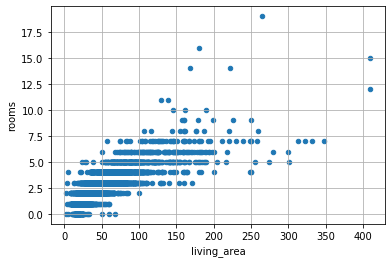

Коэффициент коррелляции Пирсона между rooms и living_area составляет: 0.846


In [110]:
missed('living_area')
df.plot(x='living_area', y='rooms', kind='scatter', grid=True)
plt.show()
print('Коэффициент коррелляции Пирсона между rooms и living_area составляет: {:.3f}'.format(df['rooms'].corr(df['living_area'])))


На графике видна взаимосвязь между столбцами, а также аномальные значения, но подробнее их исследуем позже, а пока заполним пропуски в living_area:

In [111]:
roomlist = df['rooms'].unique()
def fill_nan(col_forsort, column_type, value):
    median = df[df[col_forsort] == value][column_type].median()
    df.loc[(df[column_type].isna()) & (df[col_forsort] == value), column_type] = median
    
print('Заполняем пропуски в living_area:')
print()
for i in roomlist:
    fill_nan('rooms', 'living_area', i)
    print('по числу комнат: {}, осталось пропусков: {}'.format(i, df['living_area'].isna().sum()))    

Заполняем пропуски в living_area:

по числу комнат: 3, осталось пропусков: 1452
по числу комнат: 1, осталось пропусков: 794
по числу комнат: 2, осталось пропусков: 152
по числу комнат: 4, осталось пропусков: 61
по числу комнат: 5, осталось пропусков: 27
по числу комнат: 6, осталось пропусков: 21
по числу комнат: 0, осталось пропусков: 7
по числу комнат: 7, осталось пропусков: 1
по числу комнат: 11, осталось пропусков: 1
по числу комнат: 8, осталось пропусков: 1
по числу комнат: 14, осталось пропусков: 1
по числу комнат: 10, осталось пропусков: 1
по числу комнат: 15, осталось пропусков: 1
по числу комнат: 9, осталось пропусков: 0
по числу комнат: 19, осталось пропусков: 0
по числу комнат: 16, осталось пропусков: 0
по числу комнат: 12, осталось пропусков: 0


Восстановим в памяти пропущенные значения по всей таблице: 

In [112]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Займемся пропусками в потолках. Вряд ли существует какая-либо взаимосвязь высоты потолков с другими параметрами, разве что различия высоты могут зависеть от населенного пункта. Рассчитаем медианную высоту для каждого населенного пункта и заполним пропуски этими медианами:

In [113]:
print('До заполнения')
missed('ceiling_height')   
loc_list = df['locality_name'].unique()

for i in loc_list:
    fill_nan('locality_name', 'ceiling_height', i)
print()
print('После заполнения')
missed('ceiling_height')    

#Функция для создания столбца по типу населенного пункта, возможно пригодится позже.
#def loctype(row):
#    for i in typelist: 
#        if i in row:
#            return i
#    if 'санкт-петербург' == row:
#        return 'административный центр'
#    else:
#        return 'город'
        
#df['locality_type'] = df['locality_name'].apply(loctype)
#print(df['locality_type'].value_counts())

До заполнения
Количество пропущенных значений в столбце ceiling_height: 9160

После заполнения
Количество пропущенных значений в столбце ceiling_height: 106


In [114]:
df[df['ceiling_height'].isna()]['locality_name'].value_counts()

поселок кобринское          6
поселок селезнево           5
поселок усть-луга           5
село рождествено            3
деревня торошковичи         3
                           ..
поселок высокоключевой      1
деревня старое хинколово    1
село шум                    1
село никольское             1
деревня курковицы           1
Name: locality_name, Length: 72, dtype: int64

In [115]:
df[df['locality_name'] == 'поселок селезнево']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3913,7,1990000.0,47.0,2017-02-10T00:00:00,2,NaN,5.0,32.0,2,False,...,6.0,1,поселок селезнево,NaN,NaN,NaN,NaN,NaN,NaN,203.0
4026,7,1950000.0,44.0,2019-03-18T00:00:00,2,NaN,5.0,29.0,4,False,...,7.0,1,поселок селезнево,NaN,NaN,NaN,NaN,NaN,NaN,8.0
11301,6,1500000.0,43.2,2018-03-28T00:00:00,2,NaN,5.0,27.3,3,False,...,5.4,0,поселок селезнево,NaN,NaN,NaN,NaN,NaN,NaN,12.0
15075,8,2350000.0,56.0,2018-06-23T00:00:00,2,NaN,5.0,30.5,2,False,...,NaN,0,поселок селезнево,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18465,18,1900000.0,53.0,2017-08-02T00:00:00,2,NaN,5.0,32.0,1,False,...,9.0,0,поселок селезнево,NaN,NaN,NaN,NaN,NaN,NaN,65.0


Осталось 67 уникальных значений в locality_name, для которых рассчитать медианное значение по потолкам невозможно, так как для них в поле ceiling_height значения отсуствуют.

In [116]:
df[df['ceiling_height'].isna()]['locality_name'].value_counts().index 


Index(['поселок кобринское', 'поселок селезнево', 'поселок усть-луга',
       'село рождествено', 'деревня торошковичи', 'деревня аро',
       'поселок городского типа лесогорский', 'деревня заклинье',
       'деревня старополье', 'поселок усть-ижора', 'деревня выскатка',
       'деревня ям-тесово', 'поселок городского типа вознесенье',
       'поселок городского типа назия', 'село старая ладога',
       'деревня старые бегуницы', 'поселок станции свирь', 'село паша',
       'деревня иссад', 'деревня лаврики', 'поселок станции лужайка',
       'поселок плоское', 'поселок городского типа большая ижора',
       'деревня снегиревка', 'деревня терпилицы', 'деревня нижние осельки',
       'деревня большой сабск', 'деревня пустынка', 'поселок шугозеро',
       'деревня раздолье', 'поселок алексеевка', 'деревня трубников бор',
       'деревня пчева', 'поселок красносельское', 'поселок каложицы',
       'деревня пикколово', 'деревня куровицы', 'поселок калитино',
       'поселок севастьяново',

Оставшиеся пропуски заполним медианными значениями по типам населенных пунктов, соответсвенно: 'поселок', 'деревня', 'село', 'товарищество'. 

In [117]:
print('До заполнения')
missed('ceiling_height') 
print()
typelist = ['поселок', 'деревня', 'село', 'товарищество']    

def heal_ceiling(value): 
    bla = [] 
    for i in loc_list:
            if value in i:
                bla.append(i)          
    median = df[df['locality_name'].isin(bla)]['ceiling_height'].median()
    df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df[df['locality_name'].isin(bla)]['ceiling_height'].fillna(median)

#    median = df.query('locality_name in @bla')['ceiling_height'].median()
#    return median
#    df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df.query('(locality_name in @bla)')['ceiling_height'].fillna(median)
    

for i in typelist:
    heal_ceiling(i)

print('После заполнения')
missed('ceiling_height')

До заполнения
Количество пропущенных значений в столбце ceiling_height: 106

После заполнения
Количество пропущенных значений в столбце ceiling_height: 0


Таким же образом заполним пропуски в столбце floors_total, затем сравним значения floors_total и floor.

In [118]:
print('До заполнения')
missed('floors_total')   

for i in loc_list:
    fill_nan('locality_name', 'floors_total', i)

print()
print('После заполнения')
missed('floors_total')    


До заполнения
Количество пропущенных значений в столбце floors_total: 85

После заполнения
Количество пропущенных значений в столбце floors_total: 0


In [119]:
len(df[df['floors_total'] < df['floor']])

32

32 значения floor больше 'floors_total', удалим их из таблицы и приведем к целому типу:

In [120]:
print('Значений до удаления:', df.shape[0])
df = df[df['floors_total'] >= df['floor']]
df = df.reset_index(drop=True)
df['floors_total'] = pd.to_numeric(df['floors_total'], errors='coerce').astype(int)
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').astype(int)
print('Значений после удаления:', df.shape[0])

Значений до удаления: 23650
Значений после удаления: 23618


Заполним ропуски в поле kitchen_area, для этого посчитаем отношение медианны площади кухни к медиане общей площади. Умножим полученный коэффициент на размер общей площади, чтобы получить площадь кухни:

In [121]:
kitchen_share = df['kitchen_area'].median() / df['total_area'].median() 
print('Доля площади кухни от общей площади составляет:', kitchen_share)
print()
print('До заполнения')
missed('kitchen_area')
print(df['kitchen_area'].isna().sum())
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] * kitchen_share
print('После заполнения')
missed('kitchen_area')

Доля площади кухни от общей площади составляет: 0.175

До заполнения
Количество пропущенных значений в столбце kitchen_area: 2258
2258
После заполнения
Количество пропущенных значений в столбце kitchen_area: 0


Привдем столбец 'first_day_exposition' к типу datetime:

In [122]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S', yearfirst=True)

Заполним пропуски в parks_around3000 и ponds_around3000, подразумевая, что пропуски характеризуют отсуствие парков и прудов в радиусе 3км. Также приведем данные к целому типу:

In [123]:
missed('parks_around3000')
df['parks_around3000'].fillna(0, inplace=True)
#приведем пропущенные значения к целому типу:
df['parks_around3000'] = pd.to_numeric(df['parks_around3000'], errors='raise').astype(int)
print()
print('Распределение значений после заполнения в parks_around3000:')
print(df['parks_around3000'].value_counts())
print()
missed('ponds_around3000')
df['ponds_around3000'].fillna(0, inplace=True)
#приведем пропущенные значения к целому типу:
df['ponds_around3000'] = pd.to_numeric(df['ponds_around3000'], errors='raise').astype(int)
print()
print('Распределение значений после заполнения в ponds_around3000:')
print(df['ponds_around3000'].value_counts())
print()

Количество пропущенных значений в столбце parks_around3000: 5508

Распределение значений после заполнения в parks_around3000:
0    15567
1     5664
2     1742
3      645
Name: parks_around3000, dtype: int64

Количество пропущенных значений в столбце ponds_around3000: 5508

Распределение значений после заполнения в ponds_around3000:
0    14550
1     5686
2     1888
3     1494
Name: ponds_around3000, dtype: int64



Приведем к целому типу значения столбца last_price:

In [124]:
df['last_price'] = pd.to_numeric(df['last_price'], errors='raise').astype(int)

Можно также заполнить пропуски в days_exposition, подразумевая, что наличие пропуска в поле говорит, что объявление до сих пор размещено. Но далее для анализа это поле должно быть пустым, чтобы потом построить графики и таблицы по валидной информации.

In [125]:
#from datetime import datetime

In [126]:
#print('До заполнения')
#missed('days_exposition')
#df['restdays'] = (datetime.now() - df['first_day_exposition']).dt.days
#df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['restdays']
#print()
#df.drop(columns=['Unnamed: 0', 'restdays'], inplace=True)
#print('После заполнения')
#missed('days_exposition')

In [127]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15563
ponds_around3000            0
ponds_nearest           14550
days_exposition          3175
dtype: int64

### Вывод

Были обработаны пропущенные значения в столбцах ceiling_height, floors_total, living_area , is_apartment, kitchen_area, balcony, locality_name, parks_around3000, ponds_around3000. Вещественные данные были приведены к целочисленному типу, где это необходимо. Пустые значения в balcony, parks_around3000, ponds_around3000, is_apartment были логически приняты за отсутвие параметров, поэтому их было легко заменить на 0. Значения в других столбцах рассчитывались при помощи статистических методов, устойчивыми к выбросам - медианой. Остальные значения оставим незаполненными, поскольку для них сложно выделить общие признаки, чтобы подобрать наиболее подходящий параметр, которым можно было бы заполнить пропуски. На следующих этапах часть пропусков будет отсечена засчет обработки статистических выбросов.

### №3. Посчитаем и добавим в таблицу:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Рассчитаем стоимость квадратного метра:

In [128]:
df['square_cost'] = df['last_price'] / df['total_area']

Добавим в таблицу столбцы с днем недели, месяцем и годом публикации:

In [129]:
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday

Следующим шагом добавим этажность:

In [130]:
def nofstoreys(row):
    floor = row['floor']
    fl_total = row['floors_total']
    if 1 == floor:
        return 'первый'
    if floor == fl_total:
        return 'последний'
    else:
        return 'другой'
df['storey'] = df.apply(nofstoreys, axis=1)

Добавим еще два столбца, в которых посчитаем соотношение жилой площади к общей, а также отношение площади кухни к общей:

In [131]:
df['share_living'] = df['living_area'] / df['total_area']
df['share_kitchen'] = df['kitchen_area'] / df['total_area']

In [132]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_cost,year,month,weekday,storey,share_living,share_kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,2,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,3,234.0,424.0,408176.100629,2015,7,4,другой,0.283019,0.175000
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000


### Вывод

Были добавлены столбцы 'square_cost' - рассчет стоимости квадратного метра; 'year', 'monhs', 'weekday' - соответственно год, месяц и день недели; 'storey' - этажность; 'share_living' и 'share_kitchen' - доля жилой площади и площади кухни от общей.

### №4. Проведем исследовательский анализ данных, для этого:

- Изучим такие параметры, как площадь, цена, число комнат, высота потолков и построим гистограммы для них.
- Изучим время продажи квартиры и построим гистограмму, рассчитаем среднее и медиану и опишем, сколько обычно занимает продажа. 
- Уберем редкие и выбивающиеся значения.
- Изучим, от каких факторов зависит стоимость жилья.
- По числу объявлений выберем 10 населённых пунктов с наибольшим количеством и посчитаем среднюю цену квадратного метра для них. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 
- Выделим квартиры в Санкт-Петербурге, которые входят в центр, затем посчитаем среднюю цену для каждого километра. Построим график, которы будет показывать как цена зависит от удалённости от центра. 
- По сегменту квартир в центре проанализируем следующие параметры: площадь, цена, число комнат, высота потолков. 

In [133]:
col_list = ['total_area', 'living_area', 'last_price', 'rooms', 'ceiling_height']
for i in col_list:
    if i == 'ceiling_height':
        print('Данные по столбцу', i + ':')
        print(df[i].describe())
        print()
        continue
    print('Данные по столбцу', i + ':')
    print(df[i].describe().astype(int))
    print()    

Данные по столбцу total_area:
count    23618
mean        60
std         35
min         12
25%         40
50%         52
75%         69
max        900
Name: total_area, dtype: int64

Данные по столбцу living_area:
count    23618
mean        34
std         21
min          2
25%         18
50%         30
75%         42
max        409
Name: living_area, dtype: int64

Данные по столбцу last_price:
count        23618
mean       6541040
std       10902762
min          12190
25%        3400000
50%        4650000
75%        6790000
max      763000000
Name: last_price, dtype: int64

Данные по столбцу rooms:
count    23618
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

Данные по столбцу ceiling_height:
count    23618.000000
mean         2.732062
std          1.003290
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64



По всем столбцам заметны аномальные значения и выбросы: 
- total_area: едва ли возможна общая площадь в 12 квадратных метров. Далее надо изучить распределение данных на гистограмме.
- living_area: нереальные 2 кв.м;
- last_price: вряд ли квартира может стоит 12000 рублей;
- rooms: 0 комнат, которые были найдены выше, также смущает 19 комнат.
- ceiling_height: с минимальным значением в 1м вряд ли пригодно для жизни человеку, как и 100м сильно выбивается. Что говорит об этом гугл? Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра.


Построим гистограммы для этих столбцов:

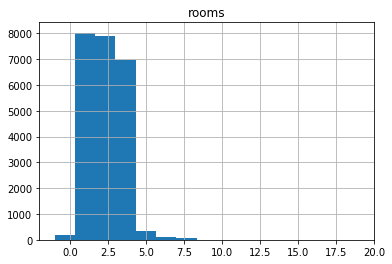

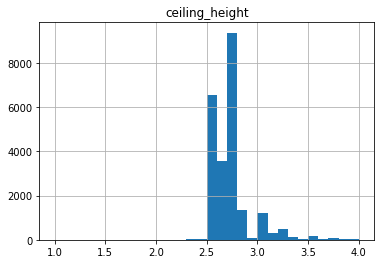

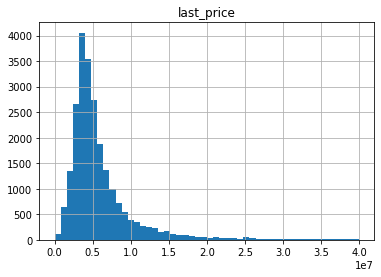

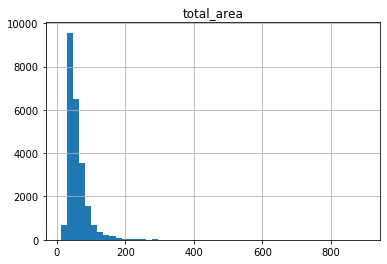

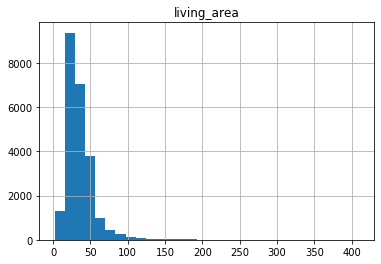

In [134]:
df.hist('rooms', bins=15, range=(-1, 19))
df.hist('ceiling_height', bins=30, range=(1, 4))
df.hist('last_price', bins=50, range=(0, 40000000))
df.hist('total_area', bins=50)#, range=(0, 900))
df.hist('living_area', bins=30)#, range=(0, 350))
plt.show()


Распределение на всех гистограммах имеет несимметричную форму, встречаются аномальные значения, которые могут испортить анализ данных. Исследуем выбросы при помощи диаграммы размаха. Для этого будет удобно использовать функции считающие количество выбросов и граничные значения и рисующие графики.

In [135]:
#print(df['ceiling_height'][df['ceiling_height'] > 5].value_counts())
def whiskerright(column_type):
    q3=df[column_type].quantile(0.75)
    q1=df[column_type].quantile(0.25)
    whisker = q3 + 1.5*(q3-q1)
    return whisker

def whiskerleft(column_type):
    q3=df[column_type].quantile(0.75)
    q1=df[column_type].quantile(0.25)
    whisker = q1 - 1.5*(q3-q1)
    return whisker

def outburst(column_type):
    q3outburst = len(df[df[column_type] > whiskerright(column_type)])
    q1outburst = len(df[df[column_type] < whiskerleft(column_type)])
    print('Крайнее значение "правого уса" по столбцу,', column_type + ': {:.3f}'.format(whiskerright(column_type)))
    print('Крайнее значение "левого уса" по столбцу,', column_type + ': {:.3f}'.format(whiskerleft(column_type)))
    print('Количество выбросов, превышающих размах "правого уса" по столбцу', column_type + ': {}'.format(q3outburst))
    print('Количество выбросов, превышающих размах "левого уса" по столбцу', column_type + ': {}'.format(q1outburst))
    print('Доля выбросов от общего числа значений по столбцу', column_type + ': {:.2%}'.format((q3outburst + q1outburst) / len(df[column_type])))

def bplot(value):
    df.boxplot(column=value)
    plt.show()
    outburst(value)

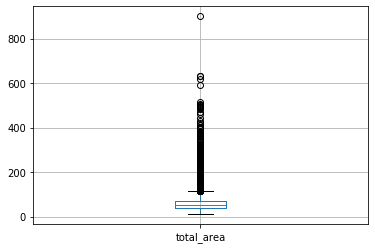

Крайнее значение "правого уса" по столбцу, total_area: 114.250
Крайнее значение "левого уса" по столбцу, total_area: -4.550
Количество выбросов, превышающих размах "правого уса" по столбцу total_area: 1242
Количество выбросов, превышающих размах "левого уса" по столбцу total_area: 0
Доля выбросов от общего числа значений по столбцу total_area: 5.26%


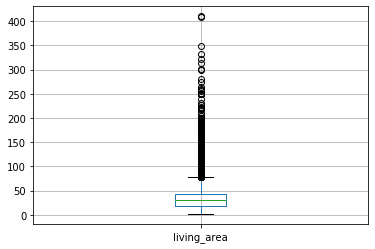

Крайнее значение "правого уса" по столбцу, living_area: 79.150
Крайнее значение "левого уса" по столбцу, living_area: -18.050
Количество выбросов, превышающих размах "правого уса" по столбцу living_area: 780
Количество выбросов, превышающих размах "левого уса" по столбцу living_area: 0
Доля выбросов от общего числа значений по столбцу living_area: 3.30%


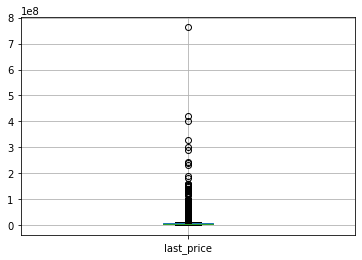

Крайнее значение "правого уса" по столбцу, last_price: 11875000.000
Крайнее значение "левого уса" по столбцу, last_price: -1685000.000
Количество выбросов, превышающих размах "правого уса" по столбцу last_price: 2054
Количество выбросов, превышающих размах "левого уса" по столбцу last_price: 0
Доля выбросов от общего числа значений по столбцу last_price: 8.70%


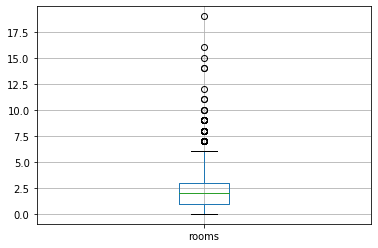

Крайнее значение "правого уса" по столбцу, rooms: 6.000
Крайнее значение "левого уса" по столбцу, rooms: -2.000
Количество выбросов, превышающих размах "правого уса" по столбцу rooms: 90
Количество выбросов, превышающих размах "левого уса" по столбцу rooms: 0
Доля выбросов от общего числа значений по столбцу rooms: 0.38%


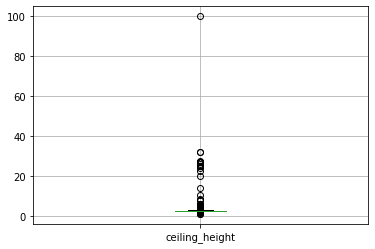

Крайнее значение "правого уса" по столбцу, ceiling_height: 2.925
Крайнее значение "левого уса" по столбцу, ceiling_height: 2.325
Количество выбросов, превышающих размах "правого уса" по столбцу ceiling_height: 2716
Количество выбросов, превышающих размах "левого уса" по столбцу ceiling_height: 20
Доля выбросов от общего числа значений по столбцу ceiling_height: 11.58%


In [136]:
for i in col_list:
    bplot(i)

Поскольку после при обработке выбросов распределение значений может смещаться, меняться значения IQR для каждого столбца, соответственно, нормальные данные могут начать попадать в выборос. Чтобы этого не произошло, сохраним часть полученных значений в переменные.

In [137]:
t_area = whiskerright('total_area')
l_area = whiskerright('living_area')
l_price = whiskerright('last_price')

Итак, мы видим, что в выбросы попало:
- по столбцу total_area: 1242 значения
- по столбцу living_area: 780 значения
- по столбцу last_price: 2054 значения
- по столбцу rooms: 90 значений
- по столбцу ceiling_height: 2736 значений
Также ящики ceiling_height и last_price оказались слишком сплющенными, изменим их масштаб и представим в более наглядном виде:

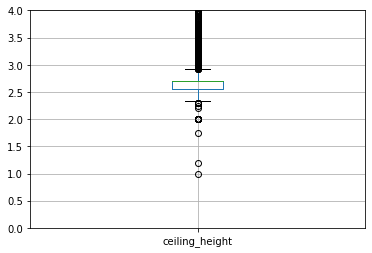

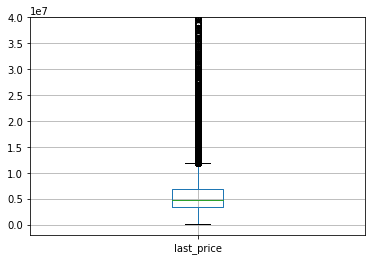

In [138]:
df.boxplot(column='ceiling_height')
plt.ylim(0, 4)
plt.show()
df.boxplot(column='last_price')
plt.ylim(-2000000, 40000000)
plt.show()

Исследуем время продажи квартир:

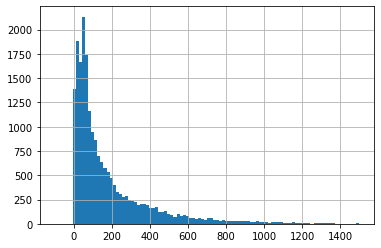

count    20443
mean       180
std        219
min          1
25%         45
50%         95
75%        231
max       1580
Name: days_exposition, dtype: int64


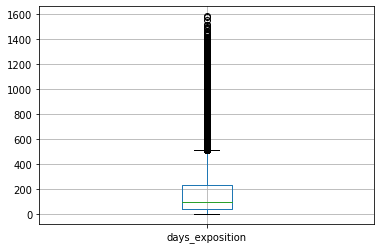

Крайнее значение "правого уса" по столбцу, days_exposition: 510.000
Крайнее значение "левого уса" по столбцу, days_exposition: -234.000
Количество выбросов, превышающих размах "правого уса" по столбцу days_exposition: 1672
Количество выбросов, превышающих размах "левого уса" по столбцу days_exposition: 0
Доля выбросов от общего числа значений по столбцу days_exposition: 7.08%


In [139]:
df['days_exposition'].hist(bins=100, range=(-100, 1500))
plt.show()
print(df['days_exposition'].describe().astype(int))
bplot('days_exposition')

Итого, средняя квартира по рынку продается за 3 месяца. В среднем, квартиры могут продоваться по полгода. Самые быстрые продажи осуществляются в интервале от 1 до 45 дней. Самые медленные - 1580 дней, т е 4.3 года, величина такого значения настораживает. 

Уберем редкие и выбивающиеся значения. Начнем с потолков и посмотрим, как изменятся значения других столбцов:

In [140]:
df = df[df['ceiling_height'] <= whiskerright('ceiling_height')]
df = df[df['ceiling_height'] >= whiskerleft('ceiling_height')]
df = df[df['living_area'] <= l_area]
df = df[df['total_area'] <= t_area]
df = df[df['last_price'] <= l_price]


for i in col_list:
    if i == 'ceiling_height':
        print('Данные по столбцу', i + ':')
        print(df[i].describe())
        print()
        continue
    print('Данные по столбцу', i + ':')
    print(df[i].describe().astype(int))
    print()


Данные по столбцу total_area:
count    19632
mean        51
std         16
min         12
25%         38
50%         47
75%         61
max        114
Name: total_area, dtype: int64

Данные по столбцу living_area:
count    19632
mean        29
std         12
min          2
25%         18
50%         28
75%         37
max         78
Name: living_area, dtype: int64

Данные по столбцу last_price:
count       19632
mean      4621149
std       2057020
min         12190
25%       3250000
50%       4250000
75%       5650000
max      11866860
Name: last_price, dtype: int64

Данные по столбцу rooms:
count    19632
mean         1
std          0
min          0
25%          1
50%          2
75%          2
max          6
Name: rooms, dtype: int64

Данные по столбцу ceiling_height:
count    19632.000000
mean         2.635267
std          0.097204
min          2.340000
25%          2.550000
50%          2.650000
75%          2.700000
max          2.920000
Name: ceiling_height, dtype: float64



Уберем аномально низкие значения в столбцах living_area, last_price и total_area через удаление данных до 2го процентиля:

In [141]:
qt_area = df['total_area'].quantile(0.02)
ql_area = df['living_area'].quantile(0.02)
ql_price = df['last_price'].quantile(0.02)
df = df[df['living_area'] >= ql_area]
df = df[df['total_area'] >= qt_area]
df = df[df['last_price'] >= ql_price]
df = df.reset_index(drop=True)

print('Значения второго процентиля по столбцу living_area:', ql_area)
print('Значения второго процентиля по столбцу total_area:', qt_area)
print('Значения второго процентиля по столбцу last_price:', ql_price)
print()
print(df['total_area'].describe().astype(int))
print()
print(df['living_area'].describe().astype(int))
print()
print(df['last_price'].describe().astype(int))

Значения второго процентиля по столбцу living_area: 14.0
Значения второго процентиля по столбцу total_area: 28.0
Значения второго процентиля по столбцу last_price: 1250000.0

count    18650
mean        52
std         16
min         28
25%         39
50%         48
75%         62
max        114
Name: total_area, dtype: int64

count    18650
mean        29
std         11
min         14
25%         18
50%         29
75%         38
max         78
Name: living_area, dtype: int64

count       18650
mean      4743695
std       2010065
min       1250000
25%       3370000
50%       4350000
75%       5750000
max      11866860
Name: last_price, dtype: int64


In [142]:
df['rooms'].value_counts().sort_index()

0      57
1    7003
2    6731
3    4286
4     536
5      36
6       1
Name: rooms, dtype: int64

После обработки выбросов еще остались нулевые значения в поле 'rooms'. Заменим их на медианные значения количества комнат по размеру жилой площади:

In [143]:
#чистим комнаты от нулевых значений
rooms_before = df['rooms'].value_counts()
value_list = list(df[df['rooms'] == 0]['living_area'].value_counts().index)


def heal_rooms(value):
    medianr = df[df['living_area'] == value]['rooms'].median()
    df.loc[(df['living_area'] == value) & (df['rooms'] == 0), 'rooms'] = medianr

for i in value_list:
    heal_rooms(i)
    
df['rooms'] = df['rooms'].astype(int)
print('Проверка, как заменились значения:')
rooms_after = df['rooms'].value_counts()
print(rooms_after - rooms_before)
print()
print('Оставшиеся значения в rooms, равные 0:')
print(df[df['rooms'] == 0]['living_area'])
#поскольку оставшиеся значения жилплощади примерно соответствует значению одной комнаты, заменим на единицу
df.loc[df['rooms'] == 0, 'rooms'] = 1
print()
print('Уникальные значения в поле rooms после замены:')
print(df['rooms'].value_counts().sort_index())

Проверка, как заменились значения:
0   -52
1    43
2     8
3     1
4     0
5     0
6     0
Name: rooms, dtype: int64

Оставшиеся значения в rooms, равные 0:
2011     20.46
3924     19.03
7104     24.42
12385    15.78
16601    18.44
Name: living_area, dtype: float64

Уникальные значения в поле rooms после замены:
1    7051
2    6739
3    4287
4     536
5      36
6       1
Name: rooms, dtype: int64


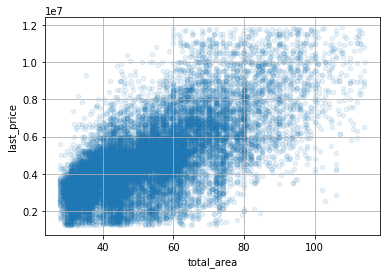

Коэффициент коррелляции для total_area и last_price составляет: 0.68


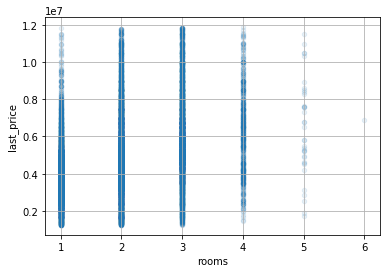

Коэффициент коррелляции для rooms и last_price составляет: 0.40


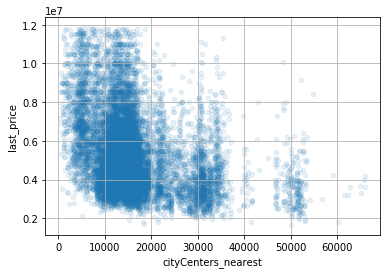

Коэффициент коррелляции для cityCenters_nearest и last_price составляет: -0.31


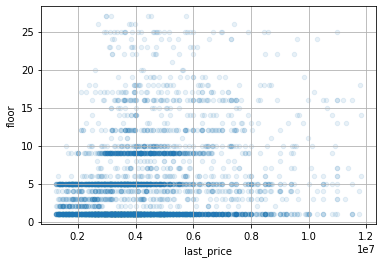

Коэффициент коррелляции для первого или послденего этажей и last_price составляет: 0.19


In [144]:
corr_list = ['total_area', 'rooms', 'cityCenters_nearest']
def correl(value, df, alpha):
    df.plot(x=value, y='last_price', kind='scatter', alpha=alpha, grid=True)
    plt.show()
    print('Коэффициент коррелляции для', value, 'и last_price составляет: {:.2f}'.format(df['last_price'].corr(df[value])))

for i in corr_list:
          correl(i, df, 0.1)

df[(df['storey'] == 'первый') | (df['storey'] == 'последний')].plot(x='last_price', y='floor', kind='scatter', alpha=0.1, grid=True)
plt.show()
storey_corr = df[(df['storey'] == 'первый') | (df['storey'] == 'последний')]['last_price'].corr(df[(df['storey'] == 'первый') | (df['storey'] == 'последний')]['floor'])
print('Коэффициент коррелляции для первого или послденего этажей и last_price составляет: {:.2f}'.format(storey_corr))

         Зависимость цены от года, месяца и дня недели публикации:


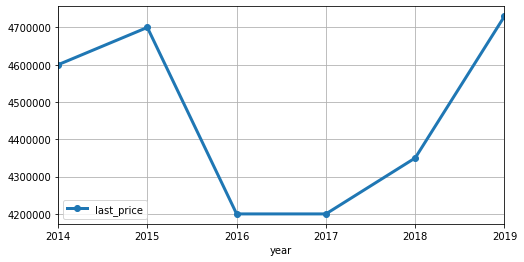

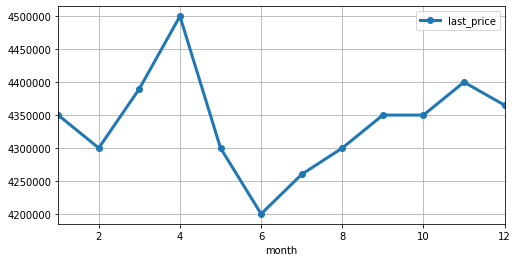

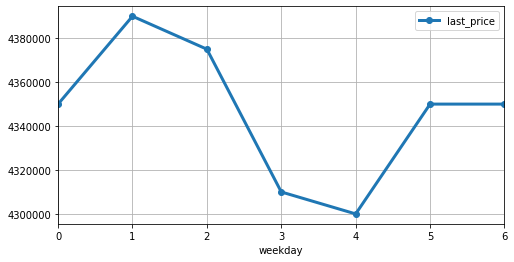

In [145]:
list_date = ['year', 'month', 'weekday']
def corr_date(value, df):
    df.groupby(value)['last_price'].median().plot(grid=True, style='o-', figsize=(8,4), linewidth=3, legend=True)
    plt.show()
#    print('Коэффициент коррелляции для', value, 'и last_price составляет: {:.2f}'.format(df['last_price'].corr(df[value])))
print('         Зависимость цены от года, месяца и дня недели публикации:')
for i in list_date:
    corr_date(i, df)

Таким образом: 
- Положительная средняя коррелляция существует между жилой площадью и ценой, коэффициент коррелляции составляет: 0.68
- Положительная слабая коррелляция существует между количеством комнат и ценой, коэффициент коррелляции составляет: 0.4
- Очень слабая отрицательная коррелляция существует между удаленностью от центра и ценой, коэффициент коррелляции составляет: -0.31
- Коррелляция между ценой для первого или последнего этажа почти отсутствует. Коэффициент равен: 0.19
- Зависимость цены от дня/месяца/года публикации полностью отсутсвует. Зато можно отметить интересные закономерности: самое дешевое жилье продавалось в 2016 и 2017 годах. Чаще дешевые квартиры публикуют в июне, также на пятницу приходятся самые дешевые публикации. 

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в них, после чего выделим населённые пункты с самой высокой и низкой стоимостью жилья:

In [146]:
locality_pivot = df.pivot_table(index='locality_name', values='square_cost', aggfunc=['count', 'mean', 'median',]).astype(int)
locality_pivot = locality_pivot.sort_values(by=('count', 'square_cost'), ascending=False).head(10)
locality_pivot.sort_values(by=('median', 'square_cost'), ascending=False)

,count,mean,median
,square_cost,square_cost,square_cost
locality_name,,,
санкт-петербург,11855,104322,101234
пушкин,301,99660,97938
поселок парголово,304,89892,91243
деревня кудрово,264,91754,91095
поселок мурино,469,84170,83010
поселок шушары,412,77410,75757
колпино,313,75184,74722
гатчина,280,68943,67860


In [147]:
locality_pivot[locality_pivot[('median', 'square_cost')] == locality_pivot[('median', 'square_cost')].max()]

,count,mean,median
,square_cost,square_cost,square_cost
locality_name,,,
санкт-петербург,11855,104322,101234


In [148]:
locality_pivot[locality_pivot[('median', 'square_cost')] == locality_pivot[('median', 'square_cost')].min()]

,count,mean,median
,square_cost,square_cost,square_cost
locality_name,,,
выборг,193,58053,57613


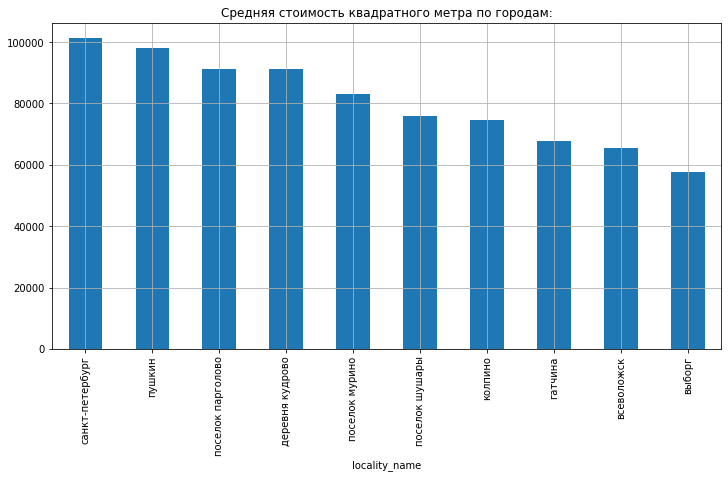

In [149]:
locality_pivot = locality_pivot.sort_values(by=('median', 'square_cost'), ascending=False)
locality_pivot.plot(y=('median', 'square_cost'), grid=True, figsize=(12, 6), kind='bar', legend=False, title='Средняя стоимость квадратного метра по городам:')
plt.show()

По 10 населенным пунктам с самым большим числом объявлений самое дорогое жильё в Санкт-Петербурге - медианная цена за квадрат составляет 101234 рублей, самое дешевое в Выборге - цена за квадрат там составляет 57613 рублей.

Изучим стоимость квартир в Санкт-Петербурге в зависимости от удаленности от центра:

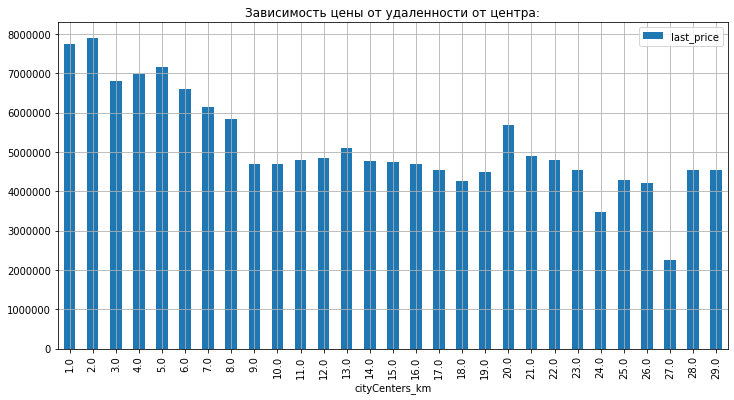

In [154]:
df['cityCenters_km'] = (df['cityCenters_nearest'] / 1000).round()
piter = df[df['locality_name'] == 'санкт-петербург']
piter.loc[piter['cityCenters_km'] == 0, 'cityCenters_km'] = 1
piter = piter.reset_index(drop=True)
loc_pit = piter.groupby('cityCenters_km')['last_price'].median()
loc_pit.plot(grid=True, figsize=(12, 6), kind='bar', legend=True, style='-o', title='Зависимость цены от удаленности от центра:')
plt.show()

Таким образом центральная зона находится в пределах 8 километров.

Теперь выделим сегмент квартир в центре и проанализируем эту территорию. Изучим такие параметры, как площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления), чтобы понять, отличаются ли они от общих выводов по всему городу.

In [151]:
an_piter = piter[piter['cityCenters_km'] <= 8]
pivot_piter = an_piter.pivot_table(index='cityCenters_km', values=['total_area', 'last_price','rooms','ceiling_height'], aggfunc='median')
pivot_piter

,ceiling_height,last_price,rooms,total_area
cityCenters_km,,,,
1.0,2.7,7750000,2.5,69.65
2.0,2.7,7900000,2.0,68.55
3.0,2.7,6800000,2.0,64.40
4.0,2.7,6990000,2.0,62.00
5.0,2.7,7170000,2.0,61.00
6.0,2.7,6600000,2.0,55.20
7.0,2.7,6150000,2.0,55.00
8.0,2.7,5850000,2.0,53.00


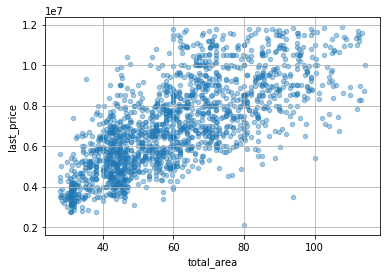

Коэффициент коррелляции для total_area и last_price составляет: 0.72


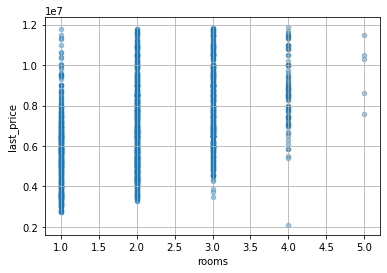

Коэффициент коррелляции для rooms и last_price составляет: 0.43


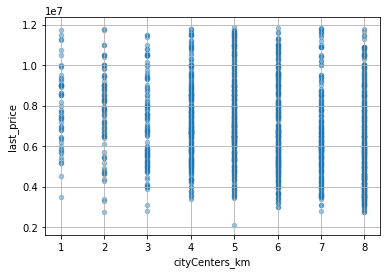

Коэффициент коррелляции для cityCenters_km и last_price составляет: -0.20


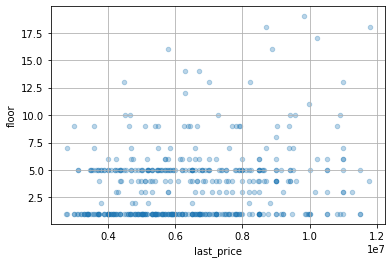

Коэффициент коррелляции для первого или послденего этажей и last_price составляет: 0.23


In [152]:
corr_list_piter = ['total_area', 'rooms', 'cityCenters_km']
for i in corr_list_piter:
          correl(i, an_piter, 0.4)
an_piter[(an_piter['storey'] == 'первый') | (an_piter['storey'] == 'последний')].plot(x='last_price', y='floor', kind='scatter', alpha=0.3, grid=True)
plt.show()
storey_corr = an_piter[(an_piter['storey'] == 'первый') | (an_piter['storey'] == 'последний')]['last_price'].corr(an_piter[(an_piter['storey'] == 'первый') | (an_piter['storey'] == 'последний')]['floor'])
print('Коэффициент коррелляции для первого или послденего этажей и last_price составляет: {:.2f}'.format(storey_corr))

         Зависимость цены от года, месяца и дня недели публикации:


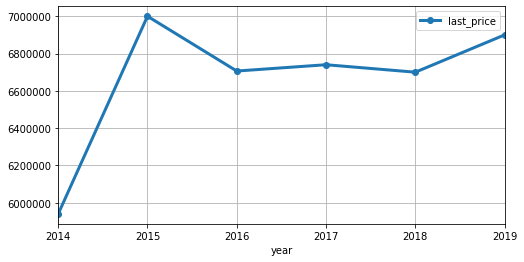

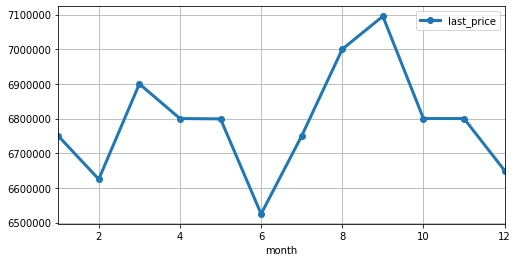

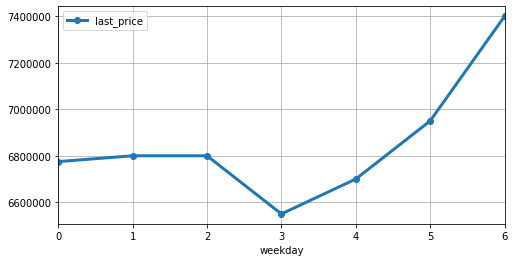

In [153]:
print('         Зависимость цены от года, месяца и дня недели публикации:')
for i in list_date:
    corr_date(i, an_piter)

Был проанализирован сегмент квартир находящийся на расстоянии от 1го до 8ми км от центра (к единице приравнял значения < 1, чтобы было меньше разброса и выбивающихся данных)
Таким образом для Санкт-Петербурга: 
- Положительная средняя коррелляция существует между жилой площадью и ценой, коэффициент коррелляции составляет: 0.71 (почти полностью совпадает с анализом по всем городам)
- Положительная слабая коррелляция существует между количеством комнат и ценой, коэффициент коррелляции составляет: 0.43 (совпадает с анализом по всем городам)
- Очень слабая отрицательная коррелляция существует между удаленностью от центра и ценой, коэффициент коррелляции составляет: -0.20 (ниже чем при анализе по всем городам, скорее всего потому, что цены скучены в одном диапазоне по километражу)
- Коррелляция между ценой для первого или последнего этажа почти отсутствует. Коэффициент равен: 0.23 (выше на 0.04 чем при анализе по всем городам)
- Самое дешевое жилье в Санкт-Петербурге продавалось в 2014 году (по всем городам это 2016 и 2017й год). Чаще дешевые квартиры публикуют в июне (как и по всем городам), а на четверг приходятся самые дешевые публикации (по всем городам - на пятницу). 

### Вывод

Были исследованы данные по столбцам total_area, storey, last_price, rooms, ceiling_height, day_exposition, month, year, weedday. Были построены гистограммы и изучено распределение значений, также были диаграммы размаха, чтобы и изучить количество статистических выбросов. Была измерена зависимость цены квартиры от площади, удаленности от центра, количества комнат, дате публикации, этажности как по всем населенным пунктам так и для центральной зоны Санкт-Петербурга. Значения зависимостей по всем локациям практически не отличаются значений по Санкт-Петербургу: зависимость цены от площади и цены от количества комнат одинаковая, зависимость удаленности от центра незначимая, так же как и для этажности. Зато самое дешевое жилье в Санкт-Петербурге продавалось в 2014 году, тогда как по всем локациям это 2016 и 2017й годы, также по дню публикации Санкт-Петербурге чаще публикуют объявления с самой дешевой ценой в четверг, тогда как по всем остальным городам - в пятницу.


### №5. Общий вывод

Были исследованы объявлений о продаже квартир, по данным сервиса Яндекс.Недвижимость, в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Была изучена информация по всей таблице, определены пропущенные значения, которые впоследствии были заполнены устойчивыми к выбросам данными по каждому столбцу. Были рассчитаны стоимость квадратного метра, отношение общей площади к жилой и площади кухни, день недели, месяц и год публикации, добавлена категория этажности. Также были проанализированы статистические выбросы и удалены из таблицы. Измерена зависимость цены от жилой площади, цены от кол-ва комнат, цены от этажности, цены от удаленности от центра и цены от даты публикации. Произведена сегментация квартир в Санкт-Петербурге по удаленности от центра - центральная зона находится в пределах 6-7 км. 
##### По всем городам выделены следующие зависимости:
- Положительная средняя коррелляция существует между жилой площадью и ценой, коэффициент коррелляции составляет: 0.68
- Положительная слабая коррелляция существует между количеством комнат и ценой, коэффициент коррелляции составляет: 0.4
- Очень слабая отрицательная коррелляция существует между удаленностью от центра и ценой, коэффициент коррелляции составляет: -0.31
- Коррелляция между ценой для первого или последнего этажа почти отсутствует. Коэффициент равен: 0.19
- Зависимость цены от дня/месяца/года публикации полностью отсутсвует. Зато можно отметить интересные закономерности: самое дешевое жилье продавалось в 2016 и 2017 годах. Чаще дешевые квартиры публикуют в июне, также на пятницу приходятся самые дешевые публикации. 

##### Для Санкт-Петерубрга:
- Положительная средняя коррелляция существует между жилой площадью и ценой, коэффициент коррелляции составляет: 0.71 
- Положительная слабая коррелляция существует между количеством комнат и ценой, коэффициент коррелляции составляет: 0.43 
- Очень слабая отрицательная коррелляция существует между удаленностью от центра и ценой, коэффициент коррелляции составляет: -0.20 
- Коррелляция между ценой для первого или последнего этажа почти отсутствует. Коэффициент равен: 0.23 
- Самое дешевое жилье в Санкт-Петербурге продавалось в 2014 году. Чаще дешевые квартиры публикуют в июне (как и по всем городам), а на четверг приходятся самые дешевые публикации.
